Estimation of heart rate with peak detection

In [44]:
pip install heartpy

In [45]:
import heartpy as hp

In [46]:
import matplotlib.pyplot as plt
import numpy as np

In [215]:
data=hp.get_data('e0103.csv')

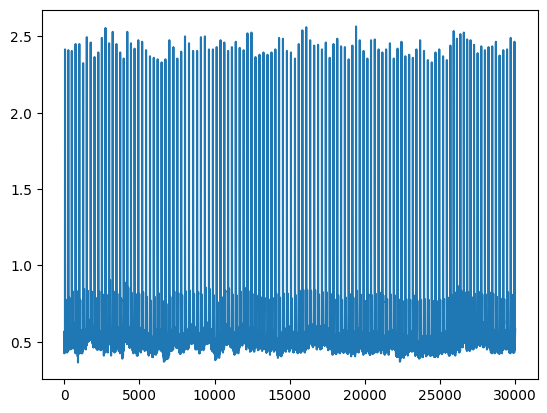

In [217]:
plt.plot(data)

The Ecg/Ekg signal

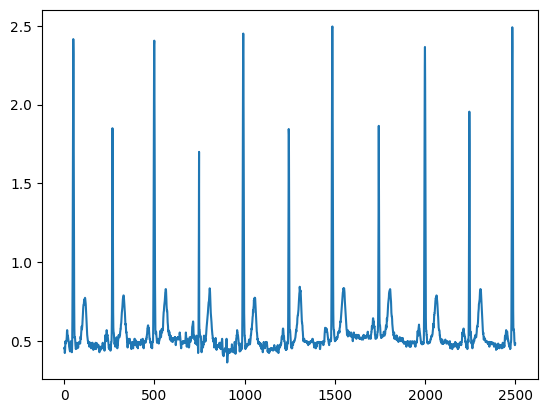

In [115]:
mag_data=data[0:2500]
plt.plot(mag_data)

Peak detection using Scipy library

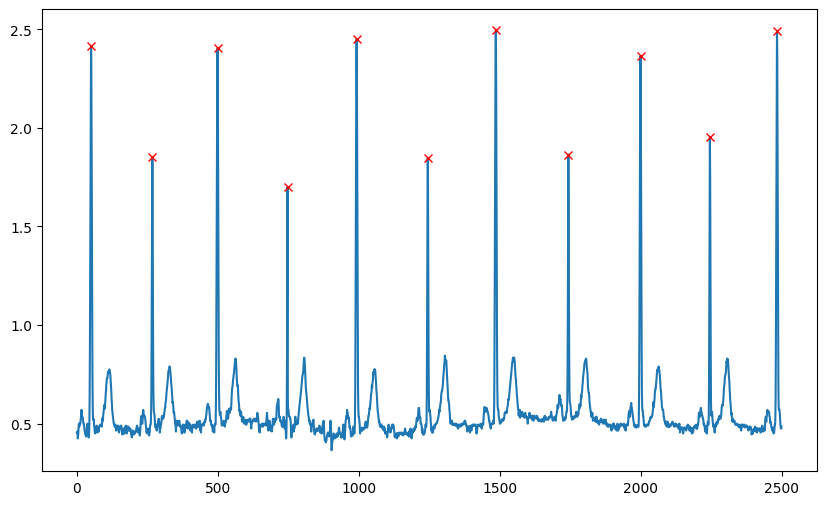

In [173]:
import numpy as np
from scipy.signal import find_peaks,detrend
import matplotlib.pyplot as plt

peaks, _ = find_peaks(mag_data, prominence=1)

plt.figure(figsize=(10, 6))
plt.plot(mag_data, label='Data')
plt.plot(peaks, data[peaks], 'x', color='red', label='Peaks')

In [174]:
import numpy as np
indices_to_remove=[1,3,5,7,9]
peaks = np.delete(peaks, indices_to_remove)
print(peaks)
peak_diff = np.diff(peaks)

[  50  499  992 1486 1999 2483]


In [169]:
peaks

array([  50,  499,  992, 1486, 1999, 2483])

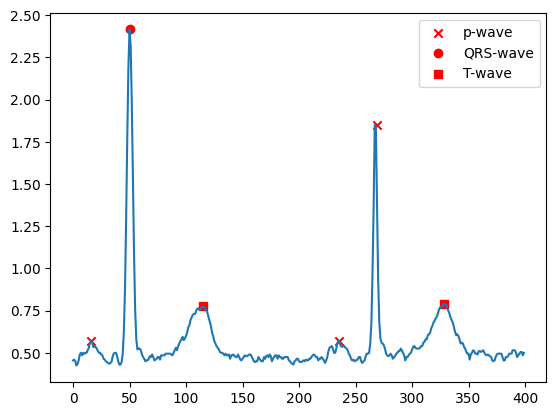

In [170]:
plt.plot(mag_data[0:400])
a_1 = max(mag_data[0:30])
b_1 = np.where(mag_data[0:48] == a_1)[0][0]
b_1 += 0
plt.scatter(b_1, a_1, color='red', marker='x', label='p-wave')

a_2 = max(mag_data[0:100])
b_2 = np.where(mag_data[0:100] == a_2)[0][0]
b_2 += 0
plt.scatter(b_2, a_2, color='red', marker='o', label='QRS-wave')

a_3 = max(mag_data[100:250])
b_3 = np.where(mag_data[100:250] == a_3)[0][0]
b_3 += 100
plt.scatter(b_3, a_3, color='red', marker='s', label='T-wave')

plt.legend()

a_4 = max(mag_data[200:250])
b_4 = np.where(mag_data[200:250] == a_4)[0][0]
b_4 += 200
plt.scatter(b_4, a_4, color='red', marker='x', label='peak')

a_5 = max(mag_data[250:300])
b_5 = np.where(mag_data[0:48] == a_1)[0][0]
b_5 += 253
plt.scatter(b_5, a_5, color='red', marker='x', label='peak')

a_6 = max(mag_data[300:350])
b_6 = np.where(mag_data[300:350] == a_6)[0][0]
b_6 += 300
plt.scatter(b_6, a_6, color='red', marker='s', label='peak')


In [175]:
array_sum = sum(peak_diff)
array_length = len(peak_diff)
average_diff = array_sum / array_length
print(average_diff)

486.6


In [176]:
# rr_interval=average_diff
print("heart rate",60/average_diff*1000)

heart rate 123.30456226880395


Data-2

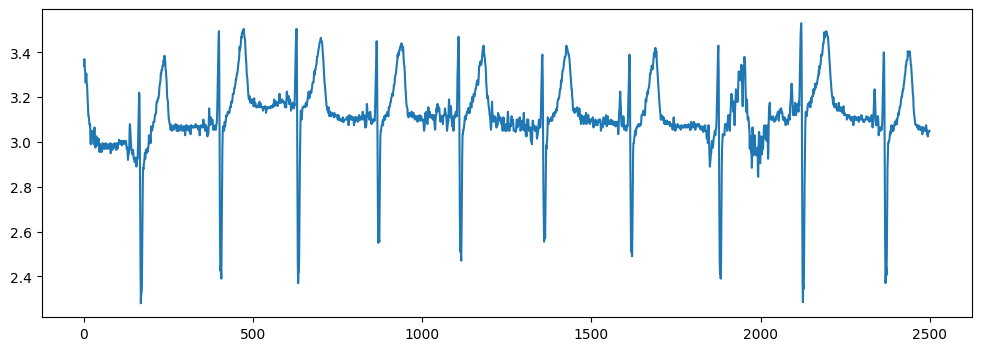

In [194]:
data_2=hp.get_data('e0110.csv')
plt.figure(figsize=(12,4))
plt.plot(data_2[0:2500])

We have an issue where the T-wave (the broad wave right after the main QRS complex) is present. We can filter this using a notch filter, as we're interested in the QRS comples.

What the notch filter does is apply a frequency filter to a very narrow frequency range, allowing us to get rid of some things without disturbing the QRS complexes.

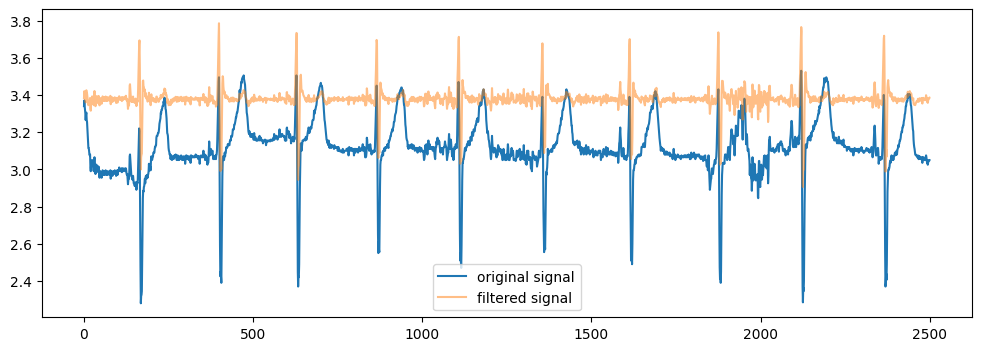

In [195]:
filtered = hp.filter_signal(data_2, cutoff = 0.05, sample_rate = 250, filtertype='notch')
plt.figure(figsize=(12,4))
plt.plot(data_2[0:2500], label = 'original signal')
plt.plot(filtered[0:2500], alpha=0.5, label = 'filtered signal')
plt.legend()
plt.show()


Recursive peak detection method



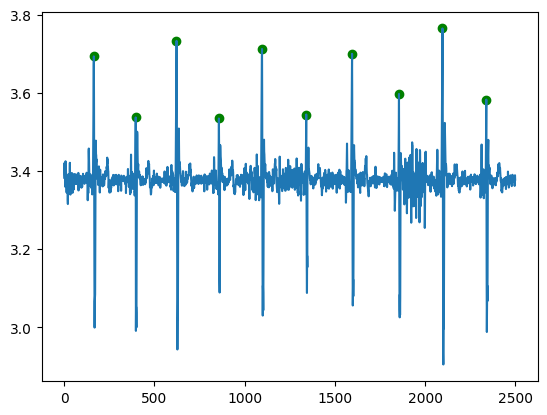

In [208]:
peak_indicess = []
peak_valuess = []
for i in range(10):  # Changed range to 10
    y = max(filtered[250*i:250+250*(i)])
    x = np.where(filtered == y)[0][0]
    peak_indicess.append(x)
    peak_valuess.append(y)
plt.plot(filtered[0:2500])
plt.scatter(peak_indicess, peak_valuess, color='green', marker='o', label='peak')

In [209]:
print(peak_indicess)

[164, 396, 622, 857, 1096, 1341, 1595, 1855, 2096, 2339]


removing the unwanted peaks

In [210]:
peak_valuess
import numpy as np
indices_to_remove = [1,3,5,7,9]
peak_valuess = np.delete(peak_valuess, indices_to_remove)
peak_indicess = np.delete(peak_indicess, indices_to_remove)
print(peak_indicess)

[ 164  622 1096 1595 2096]


Calculating the R-R  interval

In [211]:
difff = []

for i in range(len(peak_indicess) - 1):
    difference = peak_indicess[i+1] - peak_indicess[i]
    difff.append(difference)

print(difff)

[458, 474, 499, 501]


In [219]:
array_sum = sum(difff)
array_length = len(difff)
average_difff = array_sum / array_length
print(average_difff)

483.0


In [220]:
# rr_interval=average_difff
print("heart rate",60/average_difff*1000)

heart rate 124.22360248447205
